<a href="https://www.kaggle.com/code/bhavinmoriya/stats-with-scipy-all-you-want-to-know?scriptVersionId=122042233" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
!pip install pingouin

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 198.6/198.6 kB 8.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... - done
  Created wheel for littleutils: filename=littleutils-0.2.2-py3-none-any.whl size=7047 sha256=8e71d8a7dbb87431c252615c0cd442d295586af9c1e2d6b63d30919457e4d2bb
  Stored in directory: /root/.cache/pip/wheels/92/0f/7c/1a3a9b6b8a52d9be244f56389457d2f06a7bbfbfd3efbdb9db
Successfully built littleutils


In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import scipy.stats as st
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.formula.api import ols
sns.set()
import pingouin as pg


# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/experiment-by-zhou-and-colleagues/zhou_et_al_2020_exp1.csv
/kaggle/input/eye-move-vs-memory-test-matzke-2015-et-al/matzke_et_al.csv
/kaggle/input/moon-aggresion-moore-mccabe-and-craig/moon-aggression.csv
/kaggle/input/heartrate-data-from-moore-mccabe-and-craig/heartrate.csv


I will be following the content from,
https://python.cogsci.nl/numerical/statistics/

# T-tests
## Independent-samples t-test
Consider this dataset from Matzke et al. (2015). In this dataset, participants performed a memory task in which they recalled a list of words. During the retention interval, one group of participants looked at a central fixation dot on a display. Another group of participants continuously made horizontal eye movements, which is believed by some to improve memory.

You can use the ttest_ind() function from scipy.stats to test whether memory performance (CriticalRecall) was higher for the horizontal-eye-movement group as compared to the fixation group.

The Independent Samples t Test compares the means of two independent groups in order to determine whether there is statistical evidence that the associated population means are significantly different. The Independent Samples t Test is a parametric test. This test is also known as: Independent t Test.

In [3]:
df = pd.read_csv('/kaggle/input/eye-move-vs-memory-test-matzke-2015-et-al/matzke_et_al.csv')
df

,ParticipantNumber,Condition,CriticalRecall
0,1,Horizontal,4
1,3,Fixation,14
2,4,Horizontal,12
3,6,Fixation,4
4,7,Horizontal,11
5,9,Fixation,23
6,10,Horizontal,16
7,12,Fixation,22
8,13,Horizontal,9
9,15,Fixation,16


In [4]:
#missing data
df.isna().sum()

ParticipantNumber    0
Condition            0
CriticalRecall       0
dtype: int64

In [5]:
df.Condition.unique()

array(['Horizontal', 'Fixation'], dtype=object)

In [6]:
df_fixation = df[df.Condition == 'Fixation']
df_horizontal = df[df.Condition != 'Fixation']

In [7]:
# independent t-test to see if there is significant difference
t, p = st.ttest_ind(df_fixation.CriticalRecall, df_horizontal.CriticalRecall)
print(f't-stat and p-value are : {t, p}')

t-stat and p-value are : (2.845274620058386, 0.006553815987160374)


This reveals a significant difference (p = .0066). However, as you can see in the figure below, the effect goes in the opposite direction from the prediction, such that the fixation group performed best.

You can also use the ttest() function from pingouin. This also provides a Bayes Factor, for those who are into Bayesian statistics.

In [8]:
?pg.ttest

In [9]:
pg.ttest(df_horizontal.CriticalRecall, df_fixation.CriticalRecall)

,T,dof,alternative,p-val,CI95%,cohen-d,BF10,power
T-test,-2.823413,40.268769,two-sided,0.007352,"[-7.57, -1.25]",0.813105,6.455,0.795808


In [10]:
pg.ttest(df_fixation.CriticalRecall, df_horizontal.CriticalRecall)

,T,dof,alternative,p-val,CI95%,cohen-d,BF10,power
T-test,2.823413,40.268769,two-sided,0.007352,"[1.25, 7.57]",0.813105,6.455,0.795808


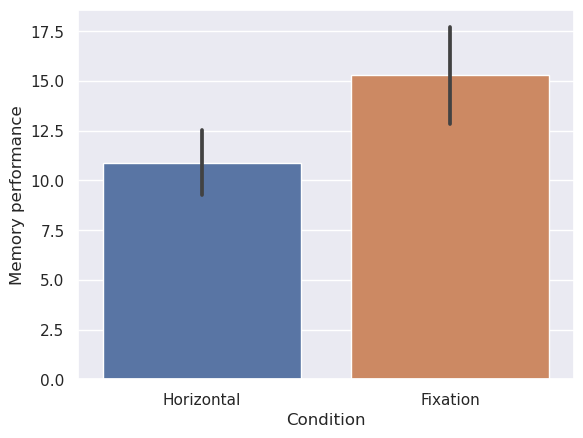

In [11]:
sns.barplot(x='Condition', y='CriticalRecall', data=df)
plt.xlabel('Condition')
plt.ylabel('Memory performance')
plt.show()

# Paired-samples t-test
Consider this dataset from Moore, McCabe, & Craig. Here, aggressive behavior from people suffering from dementia was measured during full moon and another phase of the lunar cycle. Each participant was measured at both phases, i.e. this was a within-subject design.

You can use the ttest_rel() function to test whether aggression differed between the full moon and the other lunar phase.

The Paired Samples t Test compares the means of two measurements taken from the same individual, object, or related units. These "paired" measurements can represent things like: A measurement taken at two different times (e.g., pre-test and post-test score with an intervention administered between the two time points)

In [12]:
df = pd.read_csv('/kaggle/input/moon-aggresion-moore-mccabe-and-craig/moon-aggression.csv')
df

,Moon,Other
0,3.33,0.27
1,3.67,0.59
2,2.67,0.32
3,3.33,0.19
4,3.33,1.26
5,3.67,0.11
6,4.67,0.30
7,2.67,0.40
8,6.00,1.59
9,4.33,0.60


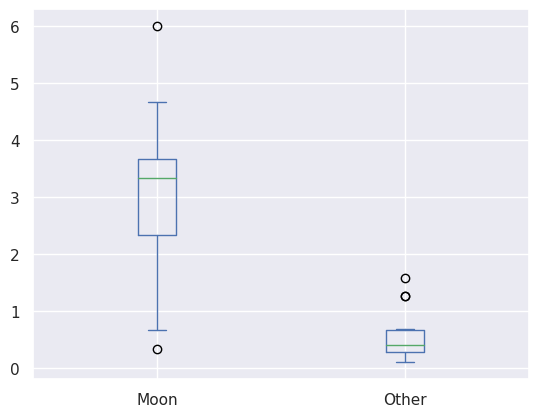

In [13]:
df.plot.box();

In [14]:
t, p = st.ttest_rel(df.Moon, df.Other)
print(f't-stat and p-value are : {t, p}')

t-stat and p-value are : (6.451788554357532, 1.5181521009727053e-05)


Interestingly, there was indeed a significant effect (p < .0001; note that p values are never 0 as the output implies!), and this effect was in such that people were indeed most aggressive during full moon, as you can see in the figure below.

You can also use the ttest() function from pingouin and use the paired keyword to indicate that this is a paired-samples t-test, as opposed to an independent-samples t-test.

In [15]:
pg.ttest(df.Moon, df.Other, paired=True)

,T,dof,alternative,p-val,CI95%,cohen-d,BF10,power
T-test,6.451789,14,two-sided,0.000015,"[1.62, 3.24]",2.200516,1521.058,1.0


And let's visualize the result. Because the measurements of the data are in two separate columns, we cannot easily use Seaborn for plotting. But we can resort to a quick plot with plt.plot().



Text(0.5, 0, 'Lunar phase')

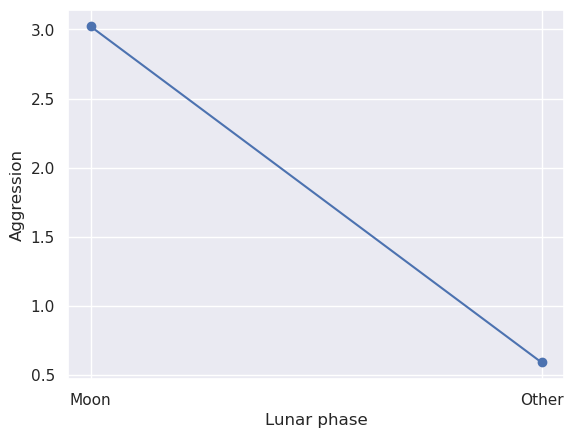

In [16]:
plt.plot([df.Moon.mean(), df.Other.mean()], 'o-')
plt.xticks([0, 1], ['Moon', 'Other'])
plt.ylabel('Aggression')
plt.xlabel('Lunar phase')

# One-sample t-test
If we take the difference between the Moon and Other measurements of the above dataset, then we can test this difference against zero (or another value specified with the popmean keyword) with ttest_1samp().

The one-sample t-test is a statistical hypothesis test used to determine whether an unknown population mean is different from a specific value.

In [17]:
diff = df.Moon - df.Other
t, p = st.ttest_1samp(diff, popmean=0)
print('t = {:.4f}, p = {:.4f}'.format(t, p))

t = 6.4518, p = 0.0000


You can also use the ttest() function from pingouin. To indicate that this is a one-sample t-test against zero, simply pass 0 as the second argument.

In [18]:
pg.ttest(diff, 0)

,T,dof,alternative,p-val,CI95%,cohen-d,BF10,power
T-test,6.451789,14,two-sided,0.000015,"[1.62, 3.24]",1.665845,1521.058,0.999969


# ANOVA
## ANOVA (regular)
Let's go back to this heart-rate data from Moore, McCabe, and Craig. This dataset contains two factors that vary between subjects (Gender and Group) and one dependent variable (Heart Rate). To test whether Gender, Group, or their interaction affect heart rate, you need the following code.

As above, the combination of ols() and anova_lm() isn't very elegant, but the important part is the formula.



In [19]:
df = pd.read_csv('/kaggle/input/heartrate-data-from-moore-mccabe-and-craig/heartrate.csv')
df

,Gender,Group,Heart Rate
0,Female,Runners,119
1,Female,Runners,84
2,Female,Runners,89
3,Female,Runners,119
4,Female,Runners,127
...,...,...,...
795,Male,Control,109
796,Male,Control,121
797,Male,Control,135
798,Male,Control,134


<AxesSubplot:xlabel='Gender,Group'>

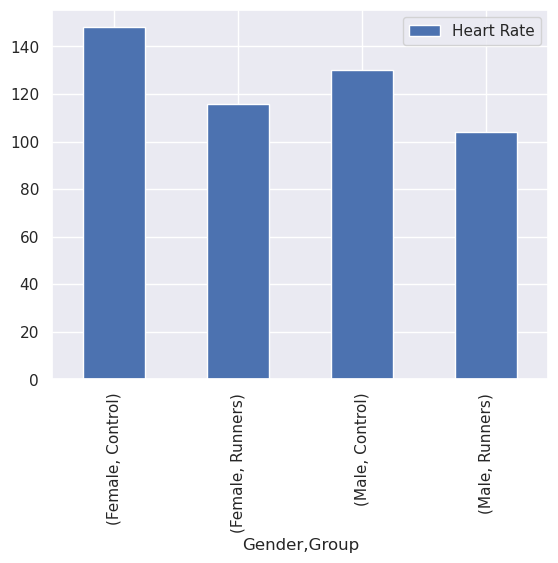

In [20]:
df.groupby(['Gender', 'Group']).mean().plot.bar()

In [21]:
from statsmodels.stats.anova import anova_lm, AnovaRM

In [22]:
df = df.rename(columns={'Heart Rate':'HeartRate'})  # statsmodels doesn't like spaces
anova_lm(ols('HeartRate ~ Gender * Group', data=df).fit())

,df,sum_sq,mean_sq,F,PR(>F)
Gender,1.0,45030.005,45030.005000,185.979949,3.287945e-38
Group,1.0,168432.080,168432.080000,695.647040,1.149926e-110
Gender:Group,1.0,1794.005,1794.005000,7.409481,6.629953e-03
Residual,796.0,192729.830,242.122902,NaN,NaN


This reveals that heart rate is related to all factors: gender (F = 185.980, p < .001), group (F = 695.647, p < .001), and the gender-by-group interaction (F = 7.409, p = .006).

You can also use the anova function from pingouin.

In [23]:
pg.anova(dv='HeartRate', between=['Gender', 'Group'], data=df)


,Source,SS,DF,MS,F,p-unc,np2
0,Gender,45030.005,1,45030.005000,185.979949,3.287945e-38,0.189393
1,Group,168432.080,1,168432.080000,695.647040,1.149926e-110,0.466362
2,Gender * Group,1794.005,1,1794.005000,7.409481,6.629953e-03,0.009223
3,Residual,192729.830,796,242.122902,NaN,NaN,NaN


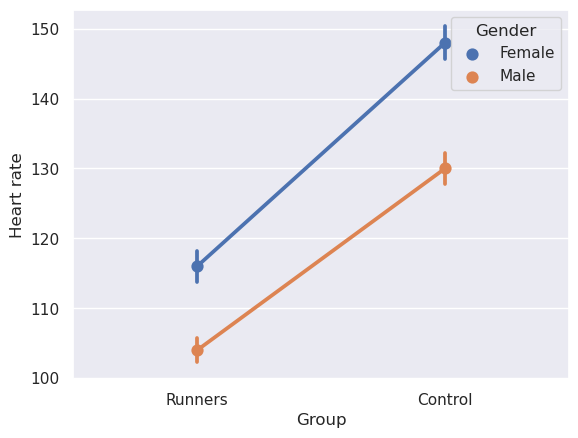

In [24]:
sns.pointplot(x='Group', y='HeartRate', hue='Gender', data=df)
plt.xlabel('Group')
plt.ylabel('Heart rate')
plt.show()

# Repeated Measures ANOVA
A Repeated Measures ANOVA is generally used to analyze data from experiments in which all participants take part in all conditions, that is, a within-subject design. An example of such a design comes from an experiment by Zhou and colleagues, in which participants searched for a target object in the presence of a distractor object. Either the target, or the distractor, or both could match a color that participants held in memory. You can download this dataset here.

To test whether the factors distractor-match, target-match, and their interaction affect search accuracy, you can use the AnovaRM class from statsmodels.stats.anova.

Somewhat different most other RM-ANOVA software, the AnovaRM class accepts the data in long, unaggregated format. That is, each row corresponds to a single observation. Statsmodels will automatically reduce this format to a format where observations are aggregated per participant and condition (which is the required format for an RM-ANOVA) using the method indicated with the aggregate_func keyword:

In [25]:
df = pd.read_csv('/kaggle/input/experiment-by-zhou-and-colleagues/zhou_et_al_2020_exp1.csv')
df

,congruency,distractor_match,memory_precision,search_correct,search_rt,subject_nr,target_match
0,1,0,97.973856,1,814.167314,0,1
1,0,1,93.137255,1,2802.247369,0,0
2,1,0,90.522876,1,1740.821425,0,1
3,1,1,94.771242,1,2336.571430,0,1
4,0,1,96.732026,1,2010.566729,0,0
...,...,...,...,...,...,...,...
8955,1,1,94.183007,1,858.606857,34,0
8956,1,1,87.189542,1,1529.860322,34,1
8957,1,1,93.006536,1,904.609669,34,0
8958,1,0,94.967320,1,606.560955,34,1


In [26]:
print(AnovaRM(
    df,
    depvar='search_correct',
    subject='subject_nr',
    within=['target_match', 'distractor_match'],
    aggregate_func='mean'
).fit())

                           Anova
                              F Value Num DF  Den DF Pr > F
-----------------------------------------------------------
target_match                   6.7339 1.0000 34.0000 0.0139
distractor_match              13.9729 1.0000 34.0000 0.0007
target_match:distractor_match  7.1687 1.0000 34.0000 0.0113



This reveals that search accuracy is affected by all factors: target match (F = 6.7339, p = .0139), distractor match (F = 13.9729, p = .0007), and the target match by distractor match interaction (F = 7.1687, p = .0113).

You can also use the rm_anova function from pingouin.



In [27]:
aov = pg.rm_anova(
    dv='search_correct',
    within=['target_match', 'distractor_match'],
    subject='subject_nr',
    data=df
)
print(aov)

                            Source        SS  ddof1  ddof2        MS  \
0                     target_match  0.013813      1     34  0.013813   
1                 distractor_match  0.013813      1     34  0.013813   
2  target_match * distractor_match  0.002136      1     34  0.002136   

           F     p-unc  p-GG-corr       ng2  eps  
0   6.733860  0.013863   0.013863  0.002314  1.0  
1  13.972917  0.000681   0.000681  0.002314  1.0  
2   7.168675  0.011339   0.011339  0.000359  1.0  


# t-distribution vs Standard normal distribution (aka z-distribution)

We shall show graphically that if degrees of freedom is at least 35 then t-distribution is almost z-dist. Hence you could use z-dist instead when data has 35 df.

t-dist is used when we do not know population std, otherwise we use z-dist.

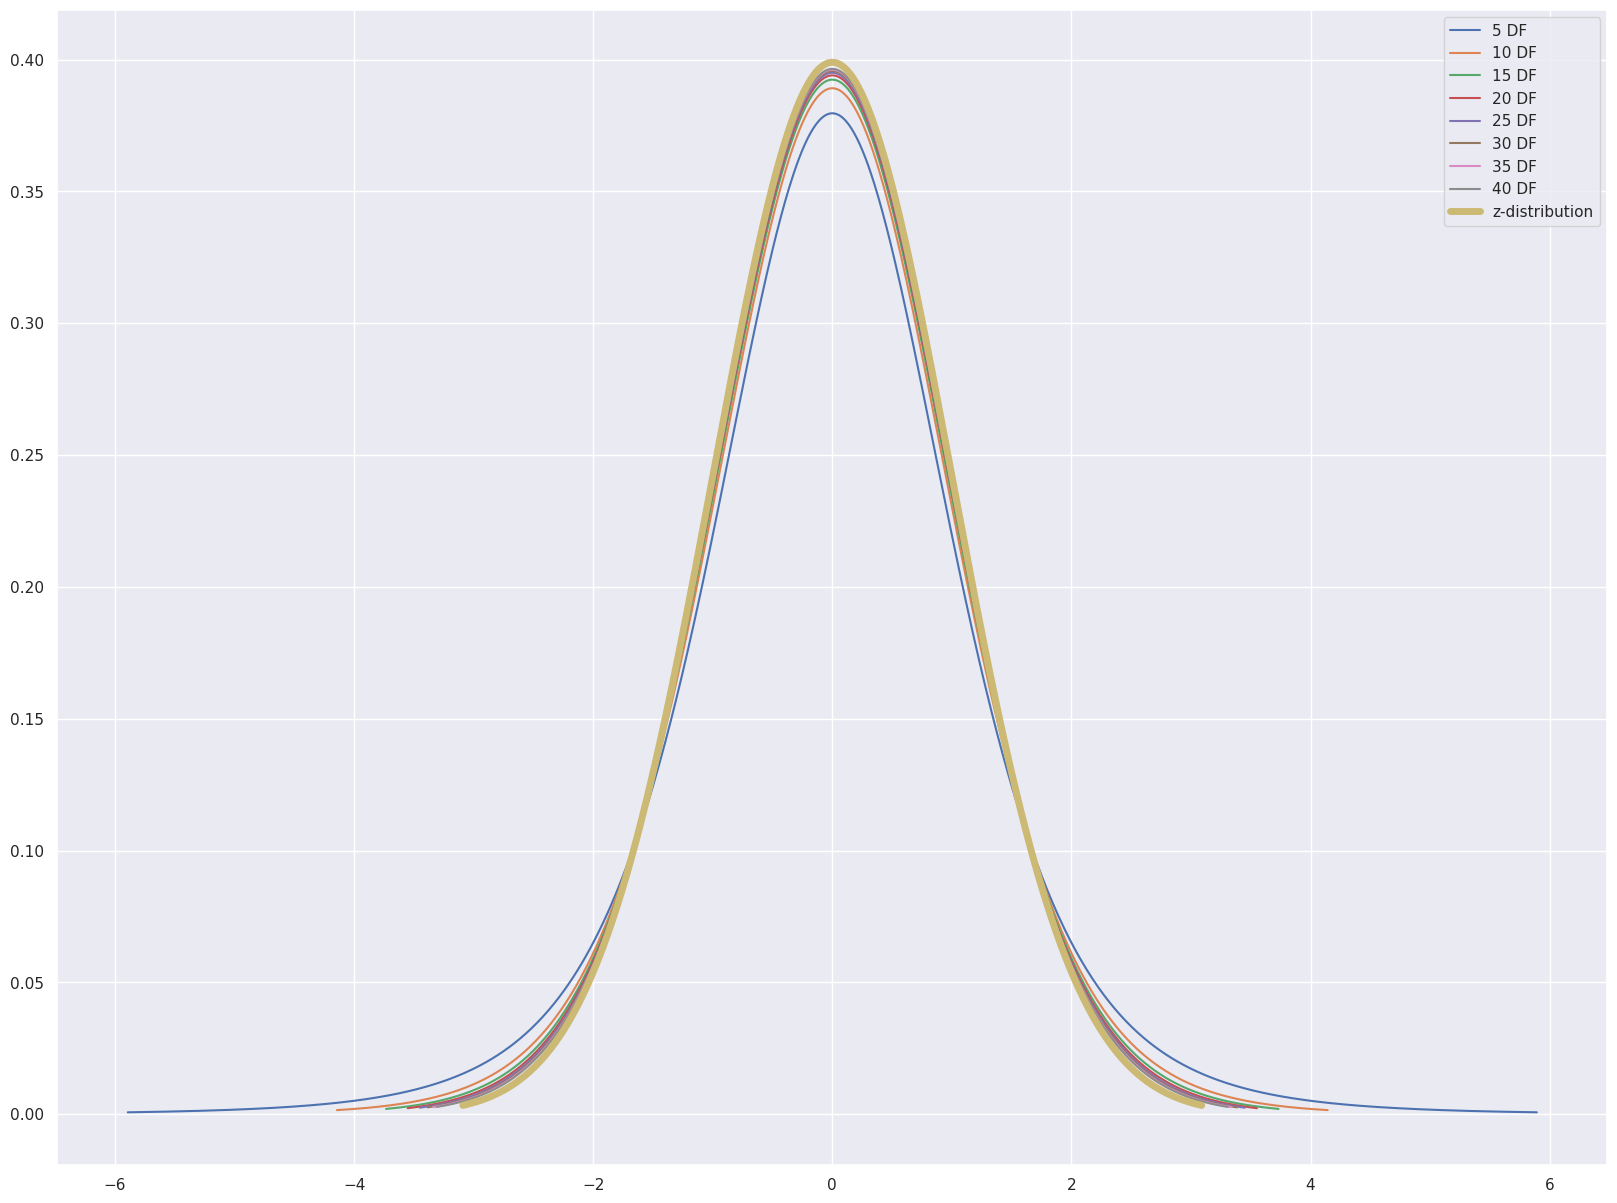

In [28]:
x = [np.linspace(st.t.ppf(0.001, df), st.t.ppf(0.999, df), 1000) for df in range(5,45,5)]

t_dist = [st.t.pdf(x[i], df=5*(i+1)) for i in range(len(x))]

plt.figure(figsize=(20,15))
for i in range(len(x)):
    plt.plot(x[i], t_dist[i], label=f'{5*(i+1)} DF')
    plt.legend()
x0 = np.linspace(st.norm.ppf(.001), st.norm.ppf(.999), 1000)
y0 = st.norm.pdf(x0)
plt.plot(x0,y0, label='z-distribution', lw=5)
plt.legend()


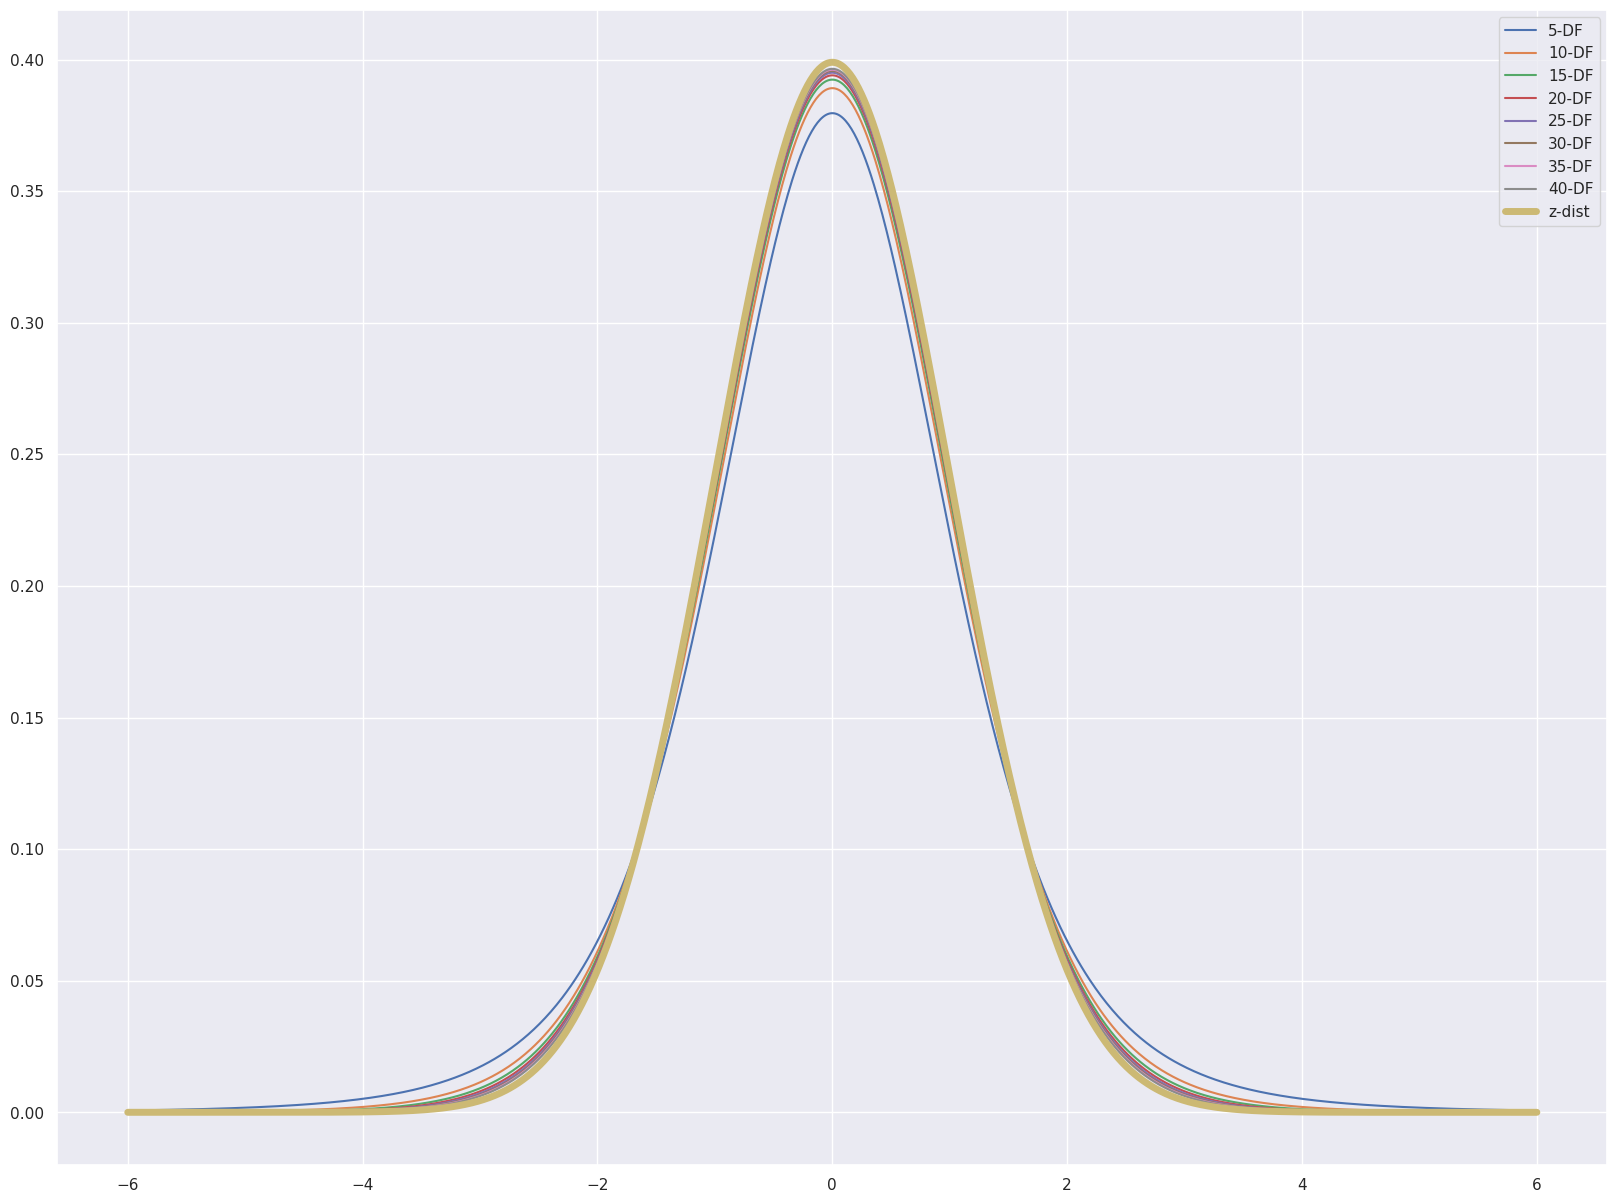

In [29]:
x = np.linspace(-6,6,1000)
plt.figure(figsize=(20,15))
for i in range(5,45,5):
    y = st.t.pdf(x, df=i)
    plt.plot(x,y, label=f'{i}-DF')
    plt.legend()
y = st.norm.pdf(x)
plt.plot(x,y, label=f'z-dist', lw=5)
plt.legend();